# E-commerce Shipping Data
- 제품 배송 시간에 맞춰 배송이 되었는지 예측(binary classification task)

- 주요 feature
    - ID: ID Number of Customers.
        - 고객의 ID 번호입니다.
    - Warehouse block: The Company have big - Warehouse which is divided in to block such as A,B,C,D,E.
        - 회사는 A,B,C,D,E와 같은 블록으로 구분된 큰 창고를 가지고 있습니다.
    - Mode of shipment:The Company Ships the products in multiple way such as Ship, Flight and Road.
        - 회사는 선박, 항공, 육로 등 다양한 방법으로 제품을 배송합니다.
    - Customer care calls: The number of calls made from enquiry for enquiry of the shipment.
        - 배송조회 문의에서 걸려온 전화수입니다.
    - Customer rating: The company has rated from every customer. 1 is the lowest (Worst), 5 is the highest (Best).
        - 회사는 모든 고객으로부터 평가했습니다. 1이 가장 낮음(최악), 5가 가장 높음(최상)입니다.
    - Cost of the product: Cost of the Product in US Dollars.
        - 제품 비용(미국 달러).
    - Prior purchases: The Number of Prior Purchase.
        - 이전 구매 수.
    - Product importance: The company has categorized the product in the various parameter such as low, medium, high.
        - 회사는 제품을 낮음, 중간, 높음과 같은 다양한 매개변수로 분류했습니다.
    - Gender: Male and Female.
        - 남성과 여성.
    - Discount offered: Discount offered on that specific product.
        - 특정 제품에 대해 제공되는 할인.
    - Weight in gms: It is the weight in grams.
        - 무게(g)입니다.
    - **[LABEL] Reached on time**: It is the target variable, where 1 Indicates that the product has NOT reached on time and 0 indicates it has reached on time.
        - 목표 변수로, 1은 제품이 정시에 도달하지 않았음을 나타내고 0은 정시에 도달했음을 나타냅니다.

---
- [reference : e-commerce shipping data in KAGGLE](https://www.kaggle.com/datasets/prachi13/customer-analytics)
- 빅분기 2회 실기 기출 데이터셋 이라고 합니다.

# #1 EDA
- 주어진 data를 EDA하고 시각화 해주세요
- 예측에 유의미한 인사이트를 서술해주세요

In [1]:
import pandas as pd
import numpy as np

X_train = pd.read_csv('./data/X_train.csv')
y_train = pd.read_csv('./data/y_train.csv')
X_test = pd.read_csv('./data/X_test.csv')

In [2]:
X_train.info()
print("---" *25)
y_train.info()
print("---" *25)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   6598 non-null   int64 
 1   Warehouse_block      6598 non-null   object
 2   Mode_of_Shipment     6598 non-null   object
 3   Customer_care_calls  6598 non-null   object
 4   Customer_rating      6598 non-null   int64 
 5   Cost_of_the_Product  6598 non-null   int64 
 6   Prior_purchases      6598 non-null   int64 
 7   Product_importance   6598 non-null   object
 8   Gender               6598 non-null   object
 9   Discount_offered     6598 non-null   int64 
 10  Weight_in_gms        6598 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 567.1+ KB
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6598 entries, 0 to 6597
Data columns (total 2 columns):
 #   Column           

In [3]:
y_train['Reached.on.Time_Y.N'].value_counts()

1    3937
0    2661
Name: Reached.on.Time_Y.N, dtype: int64

In [4]:
X_train.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms
count,6598.000000,6598,6598,6598,6598.000000,6598.000000,6598.000000,6598,6598,6598.000000,6598.000000
unique,NaN,5,3,6,NaN,NaN,NaN,3,2,NaN,NaN
top,NaN,F,Ship,4,NaN,NaN,NaN,low,F,NaN,NaN
freq,NaN,2262,4512,2115,NaN,NaN,NaN,3162,3311,NaN,NaN
mean,5476.977266,NaN,NaN,NaN,2.991361,210.393149,3.577751,NaN,NaN,13.353592,3604.191119
std,3172.946154,NaN,NaN,NaN,1.409624,48.258089,1.511394,NaN,NaN,16.187267,1635.697627
min,1.000000,NaN,NaN,NaN,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000
25%,2731.250000,NaN,NaN,NaN,2.000000,170.000000,3.000000,NaN,NaN,4.000000,1834.250000
50%,5476.000000,NaN,NaN,NaN,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4119.500000
75%,8187.750000,NaN,NaN,NaN,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5027.500000


### 데이터 구조
- 총 6598개 행, 11개의 열로 이루어진 데이터
- Reached.on.Time_Y.N: 0과 1 두개의 클래스를 가지는 이진형 변수
- 결측치는 없음 

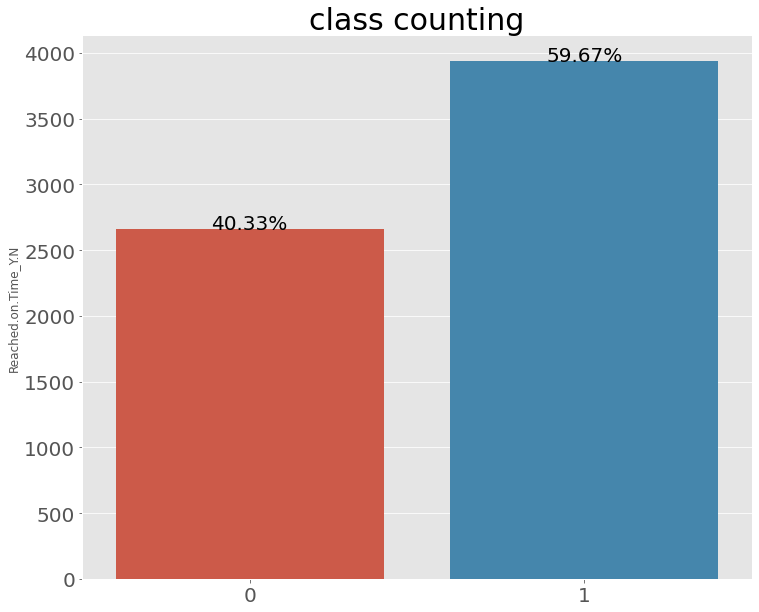

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns 

counted_values = y_train['Reached.on.Time_Y.N'].value_counts()
plt.style.use('ggplot')
plt.figure(figsize=(12, 10))
plt.title('class counting', fontsize = 30)
value_bar_ax = sns.barplot(x=counted_values.index, y=counted_values)

for i, val in enumerate(counted_values.index):    
    freq = counted_values[val]
    freq_s =  np.round((counted_values[val] / len(y_train)) * 100,2) 
    plt.text(val,freq,"%s"%freq_s+'%', horizontalalignment='center', fontsize=20)
    
value_bar_ax.tick_params(labelsize=20)

### 클래스 분포 확인
종속 변수 Reached.on.Time_Y.N 의 값이 0이 40%, 1 이 59% 정도 이며, 불균형이 심한 편은 아니다.  
제품이 시간안에 도착하지 않은 데이터가 더 많다.

In [6]:
train = X_train.copy()
train['Reached.on.Time_Y.N'] = y_train['Reached.on.Time_Y.N']

category_feature = [ col for col in X_train.columns if X_train[col].dtypes == "object"]
category_feature.append('Reached.on.Time_Y.N')
train_categori = train[category_feature]
train_categori.head()

,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance,Gender,Reached.on.Time_Y.N
0,A,Flight,4,high,F,0
1,F,Ship,3,low,M,1
2,F,Road,4,high,M,1
3,F,Ship,4,medium,F,1
4,A,Flight,5,low,M,1


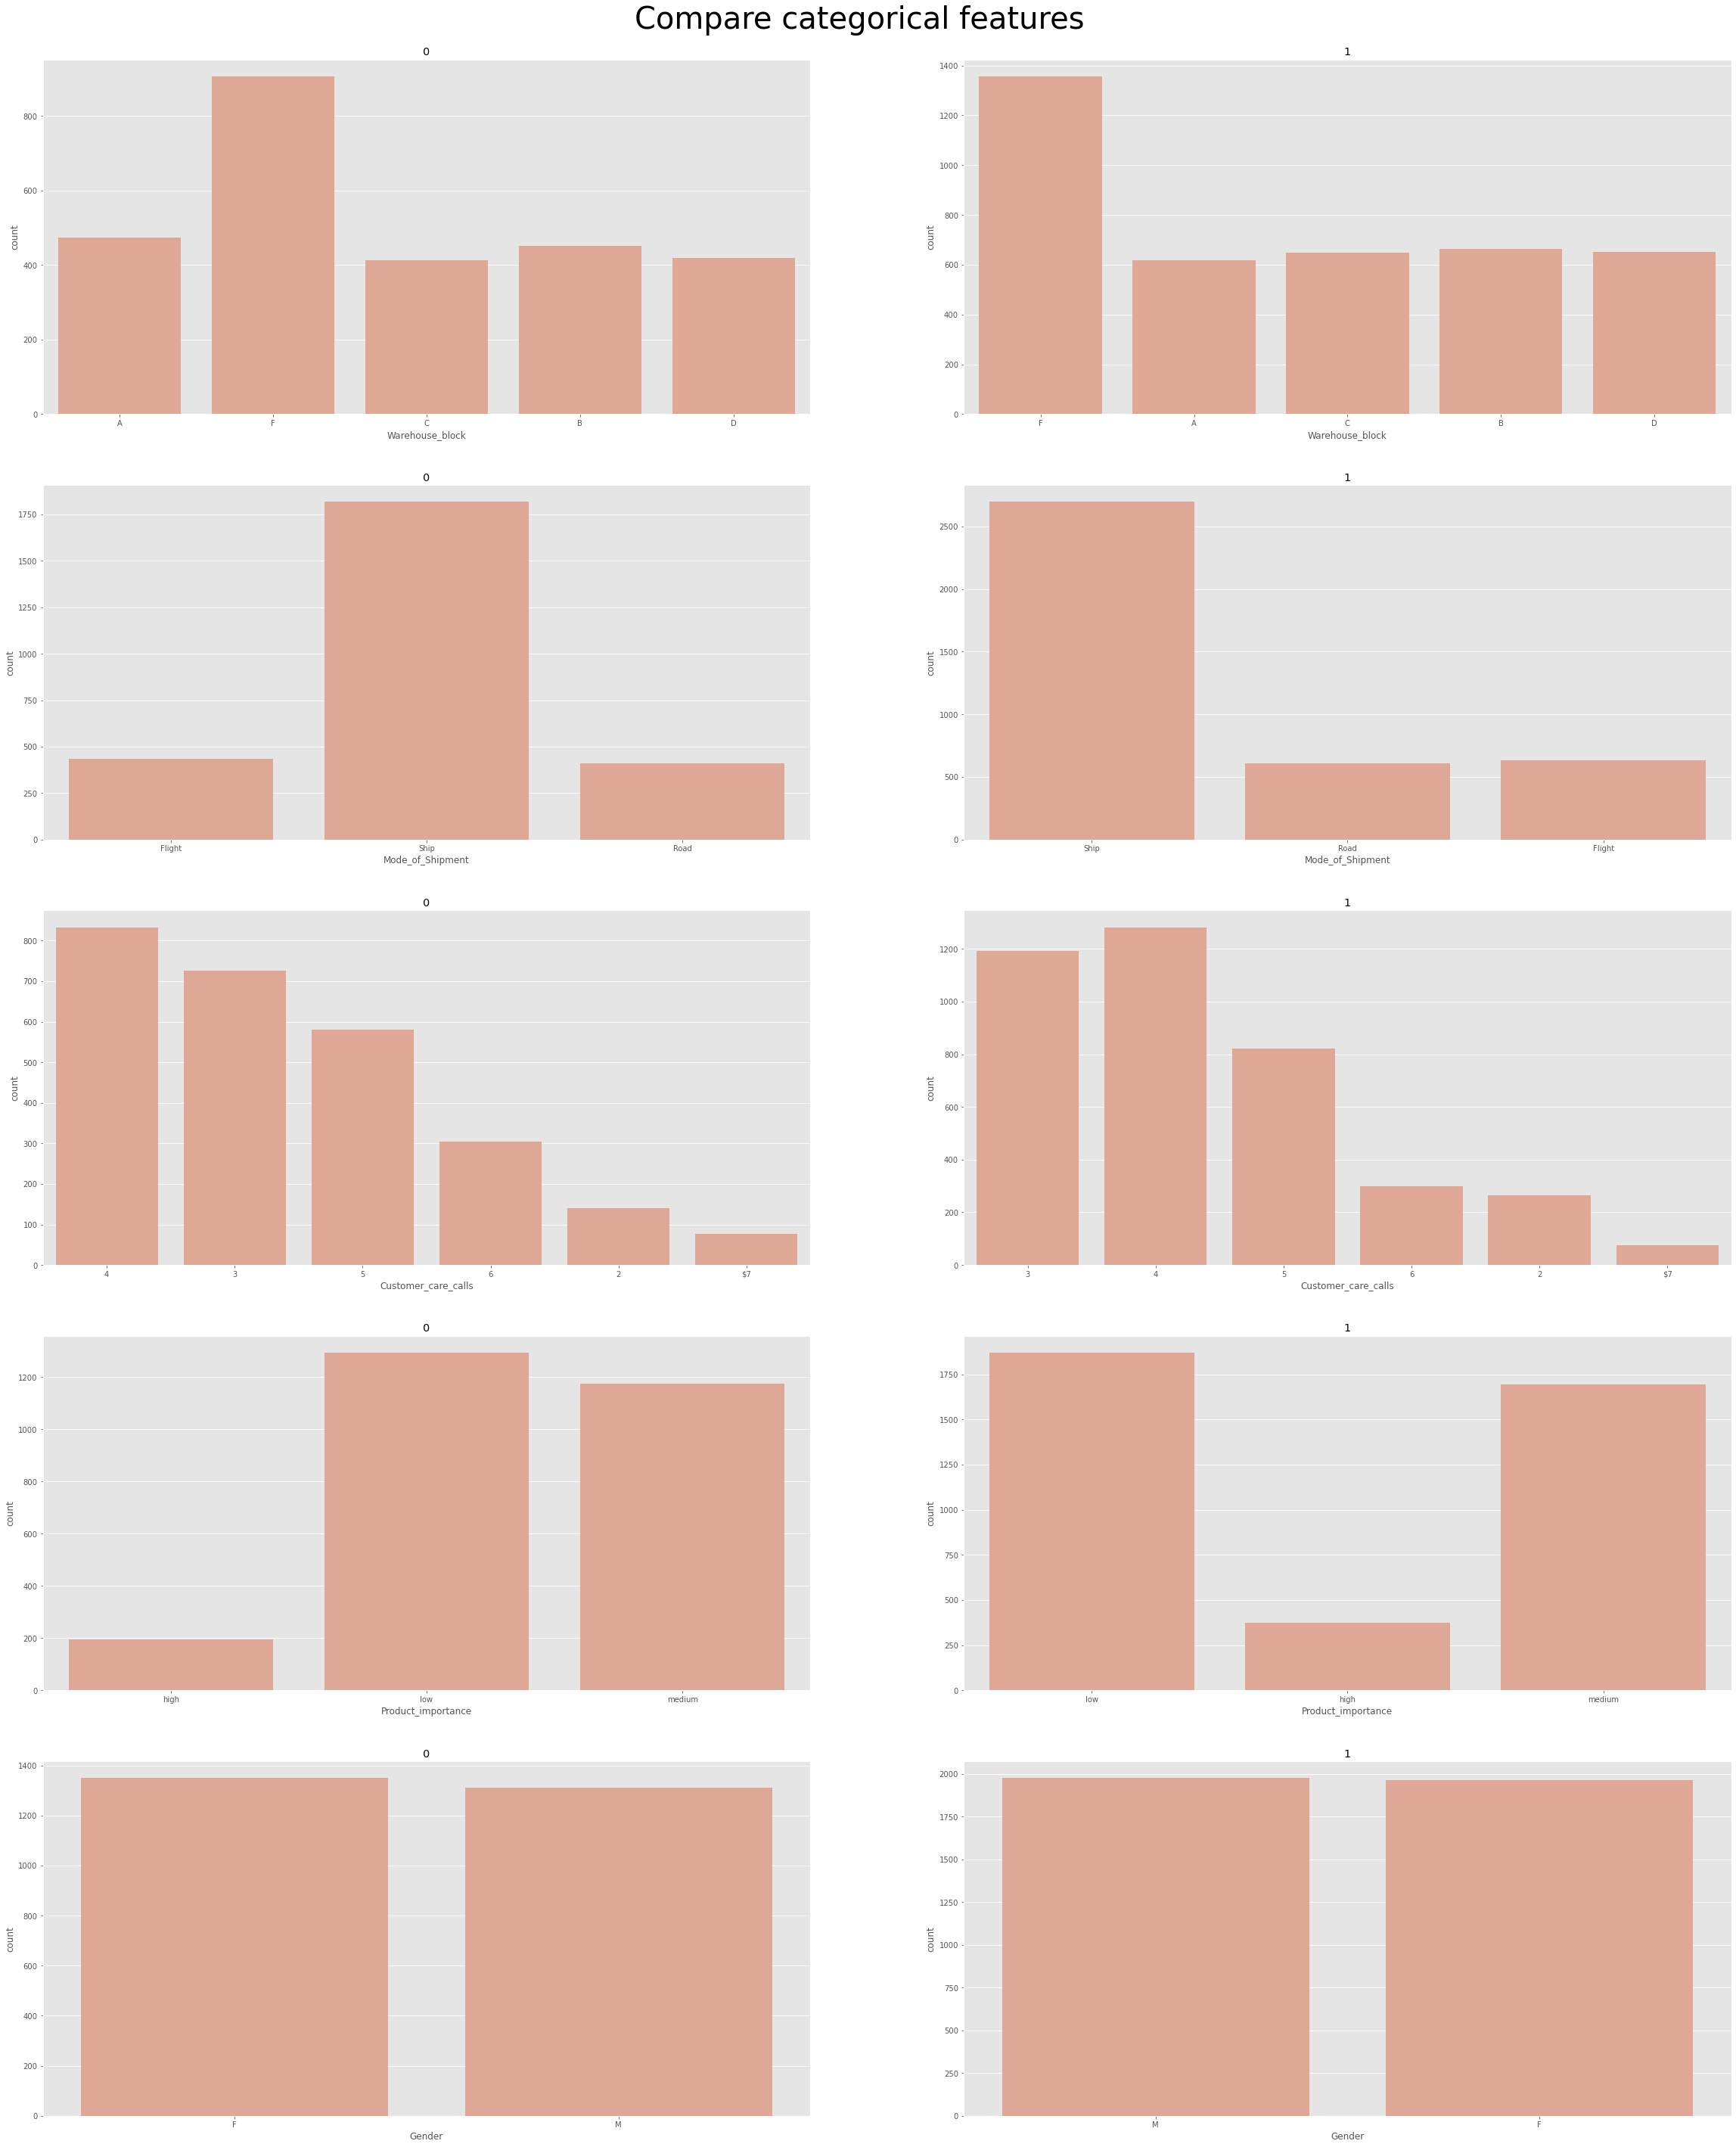

In [7]:
# 범주형 데이터 분포 
def visualize(axx, field, num): ##그래프를 그리기 위한 메소드
    # countplot을 이용하여 그래프를 그려줍니다.
    sns.countplot(x = train_categori.columns[num], data= train_categori[train_categori['Reached.on.Time_Y.N'] == field],  
                  color='#eaa18a', ax = axx) 
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10),
         )  = plt.subplots(nrows=5, ncols=2) 
        ## 원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare categorical features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<5: 
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_categori['Reached.on.Time_Y.N'].unique()[i], k)
        j = j+1
    k = k+1

### 범주형 변수 데이터 시각화
범주형 변수 Warehouse_block,Mode_of_Shipment,Customer_care_calls,Product_importance, Gender 5개 Reached.on.Time_Y.N에 따라서 막대 그래프 시각화 



In [8]:
numerical_feature = [ col for col in train.columns if train[col].dtypes != "object"]
numerical_feature.remove('ID')
train_numeric = train[numerical_feature]
train_numeric.head()

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,3,266,5,5,1590,0
1,1,174,2,44,1556,1
2,1,154,10,10,5674,1
3,3,158,3,27,1207,1
4,3,175,3,7,4833,1


In [9]:
train_numeric.describe()

,Customer_rating,Cost_of_the_Product,Prior_purchases,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000,6598.000000
mean,2.991361,210.393149,3.577751,13.353592,3604.191119,0.596696
std,1.409624,48.258089,1.511394,16.187267,1635.697627,0.490598
min,1.000000,96.000000,2.000000,1.000000,1001.000000,0.000000
25%,2.000000,170.000000,3.000000,4.000000,1834.250000,0.000000
50%,3.000000,214.000000,3.000000,7.000000,4119.500000,1.000000
75%,4.000000,251.000000,4.000000,10.000000,5027.500000,1.000000
max,5.000000,310.000000,10.000000,65.000000,7684.000000,1.000000


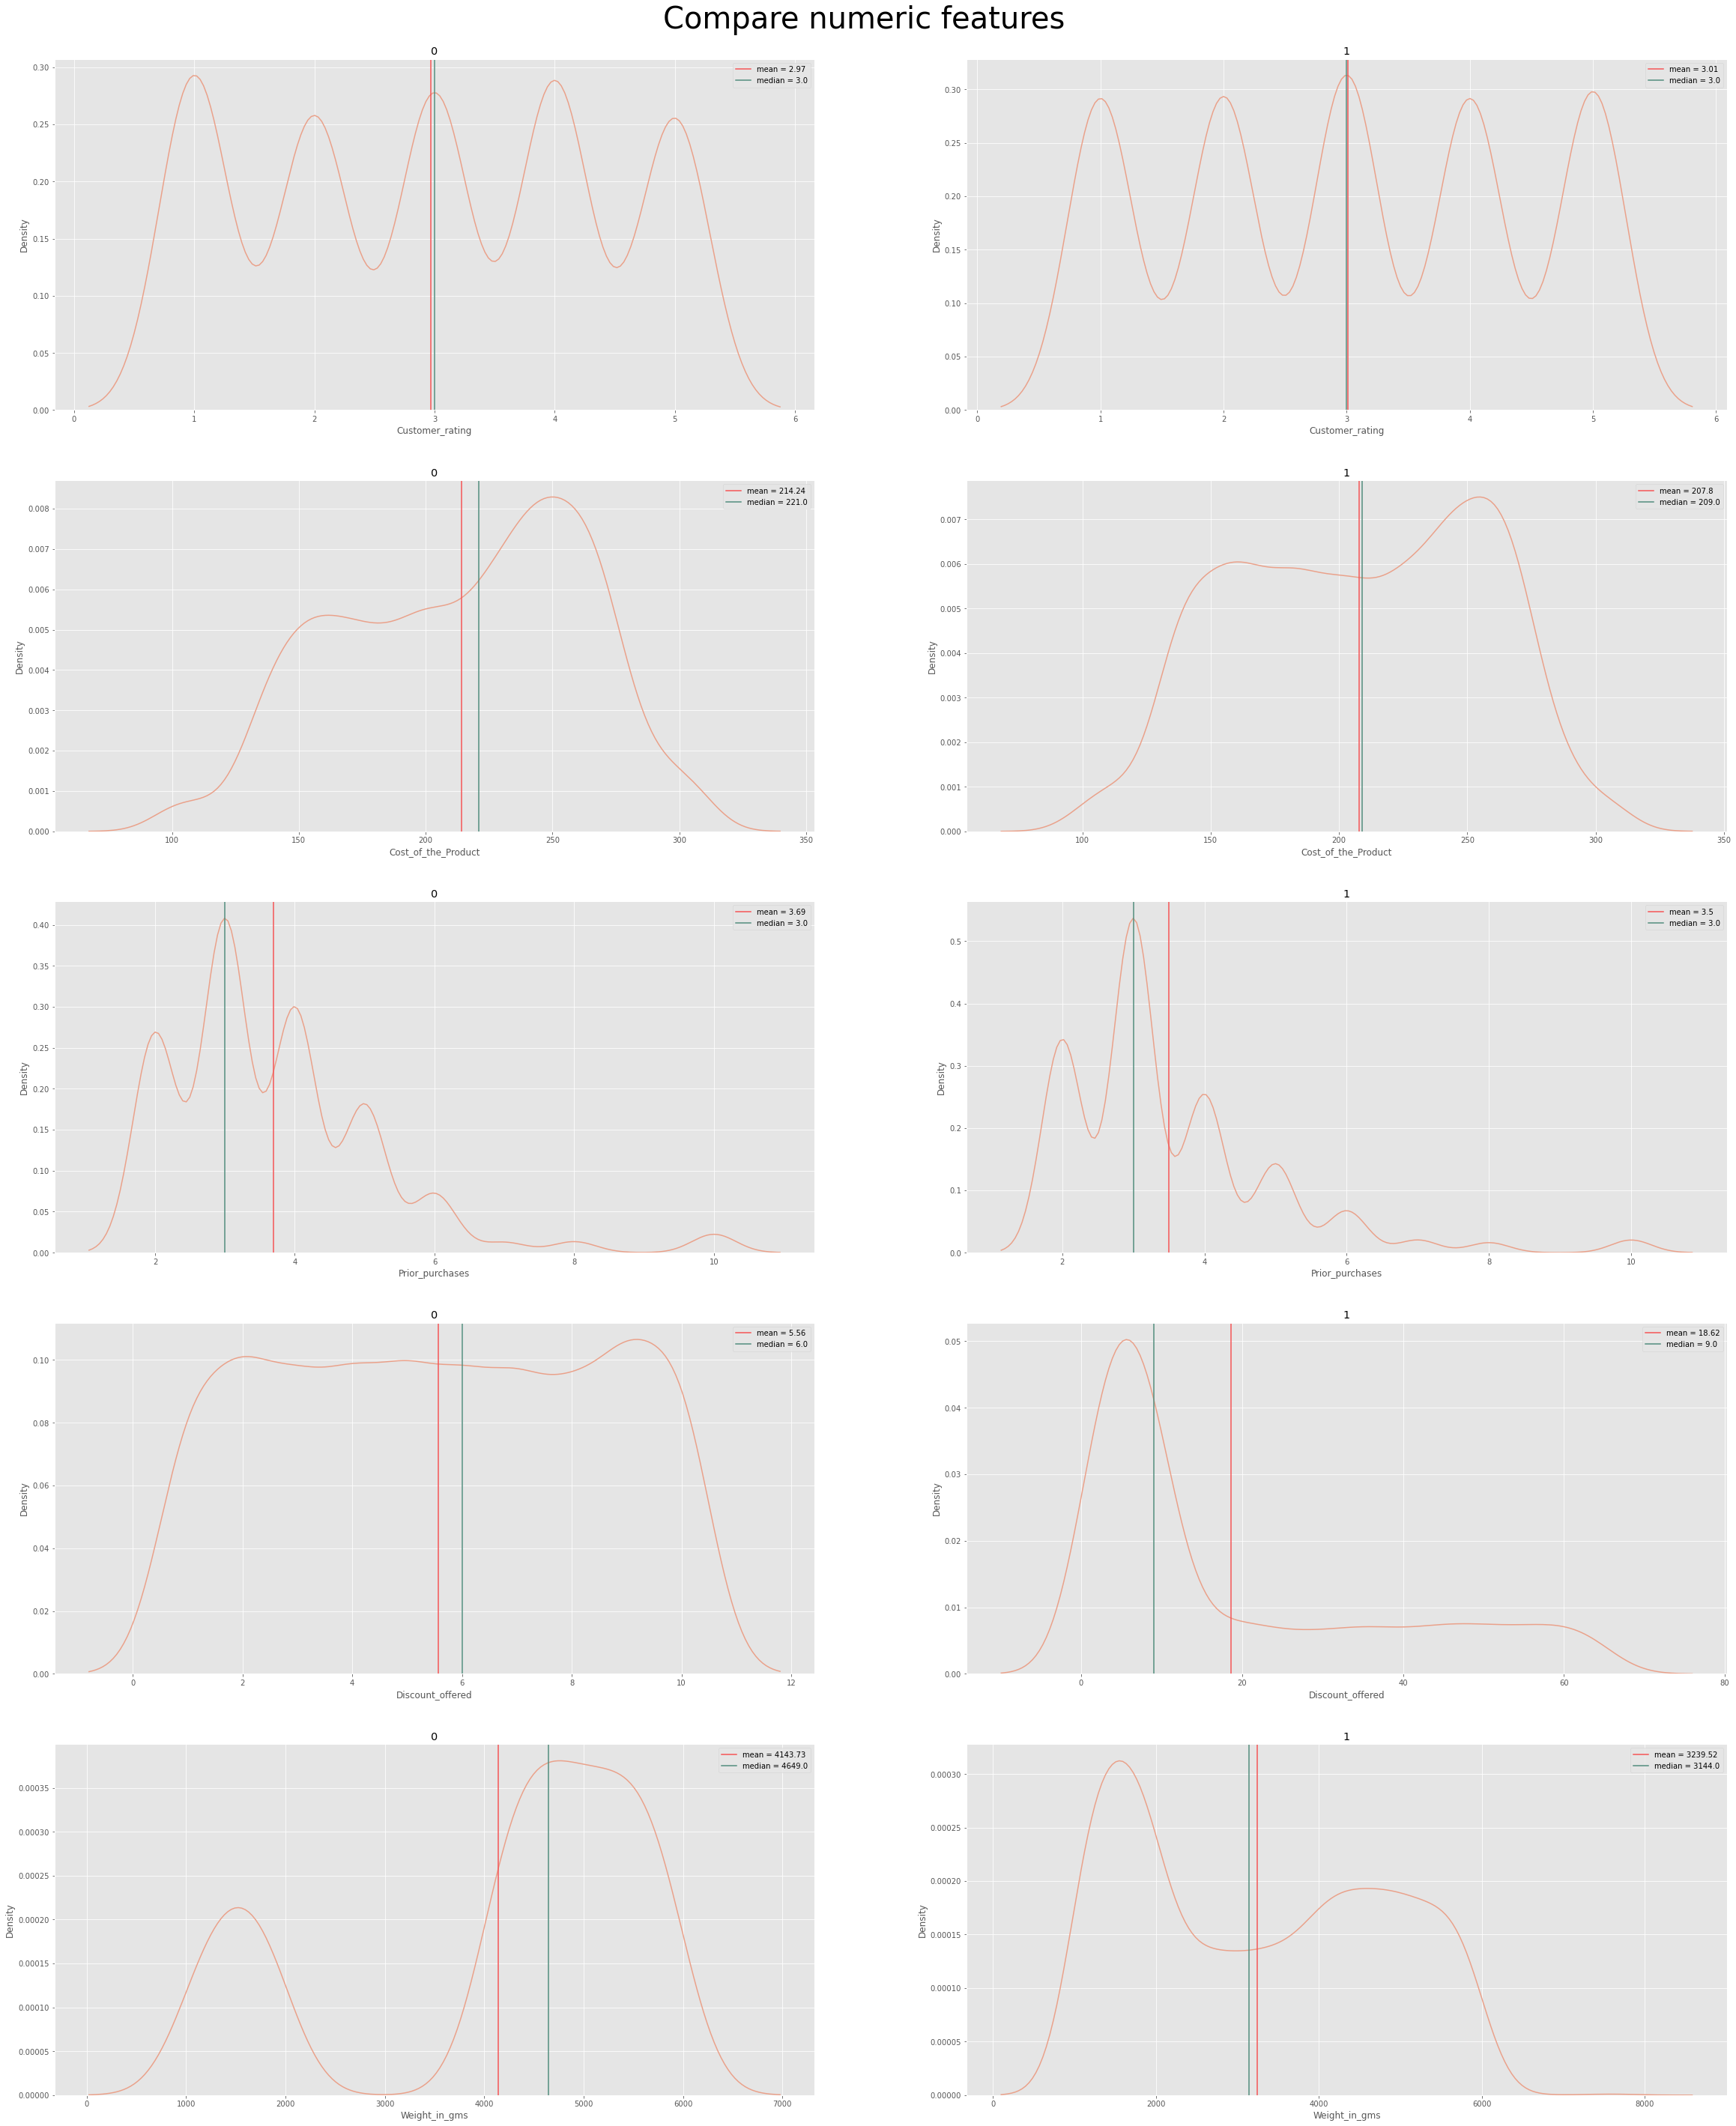

In [10]:
# 수치형 데이터 분포 
def visualize(axx, field, num):
    line = train_numeric[train_numeric['Reached.on.Time_Y.N'] == field] #메소드에서 target 클래스 추춣
    name = train_numeric[train_numeric['Reached.on.Time_Y.N'] == field][train_numeric.columns[num]].name #메소드에서 이름 추출
    sns.kdeplot(x = line[train_numeric.columns[num]],  data = train_numeric, ax = axx, color='#eaa18a') #countplot을 이용하여 그래프를 그려줍니다.
    axx.axvline(line.describe()[name]['mean'], c='#f55354', label = f"mean = {round(line.describe()[name]['mean'], 2)}") #mean 통계값을 표기해줍니다.
    axx.axvline(line.describe()[name]['50%'], c='#518d7d', label = f"median = {round(line.describe()[name]['50%'], 2)}") #median 통계값을 표기해줍니다.
    axx.legend()
    axx.set_title(field)

figure, ((ax1,ax2),(ax3,ax4), (ax5, ax6),(ax7, ax8), (ax9, ax10))  = plt.subplots(nrows=5, ncols=2) ##원하는 개수의 subplots 만들어주기
figure.set_size_inches(40, 50) #(w,h)
figure.suptitle('Compare numeric features', fontsize=40, y = 0.9)

k = 0 # 피쳐 수
j = 1 # 그래프 수
while k<5:
    for i in range(0,2):
        visualize(eval(f'ax{j}'), train_numeric['Reached.on.Time_Y.N'].unique()[i], k)
        j = j+1
    k = k+1

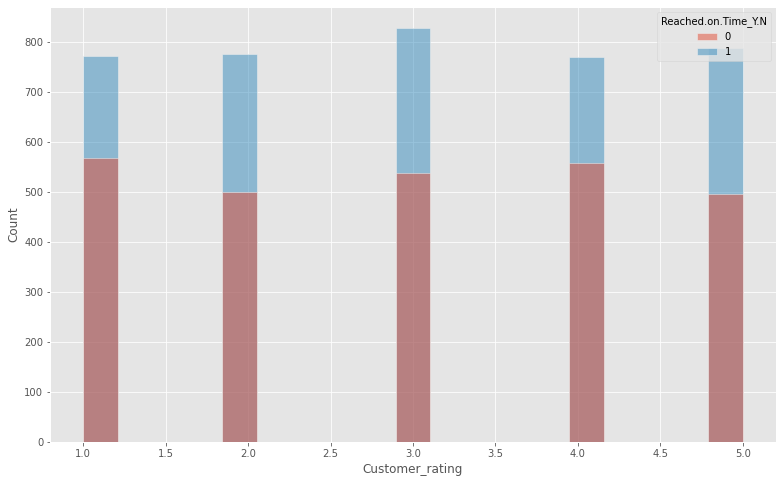

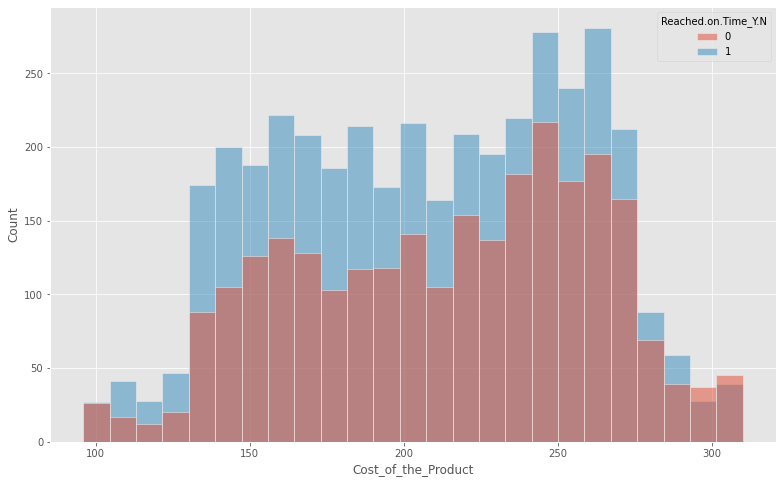

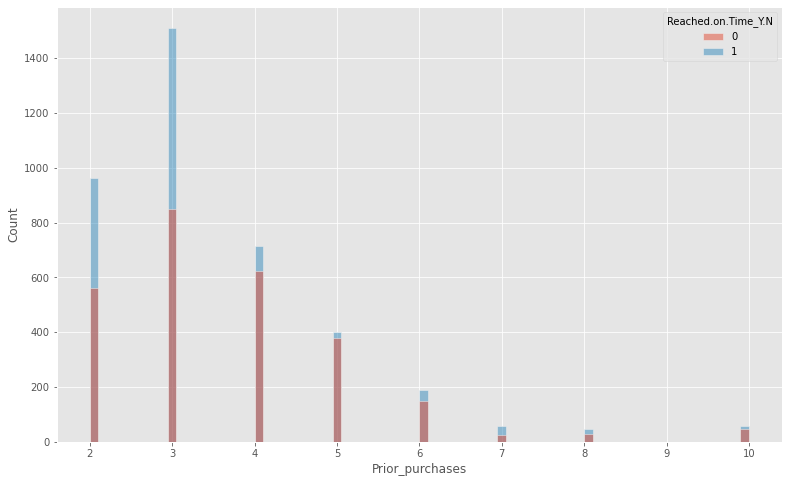

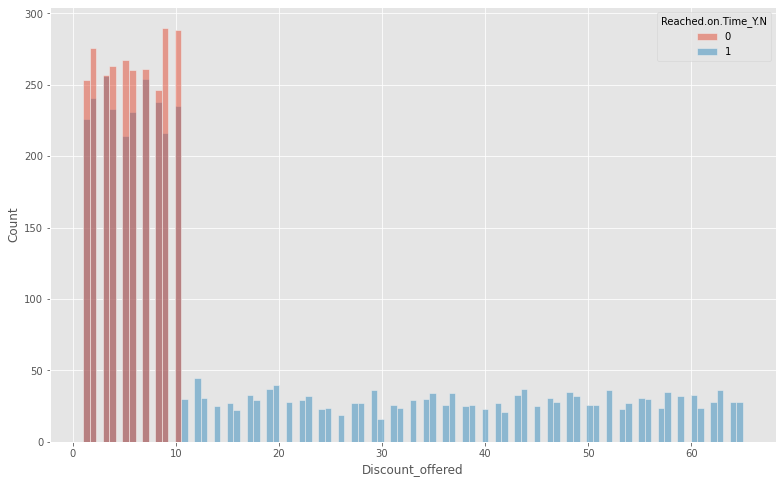

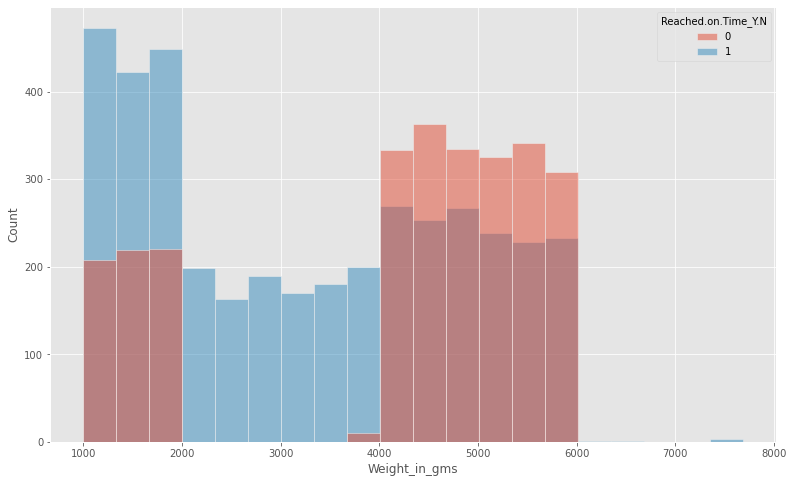

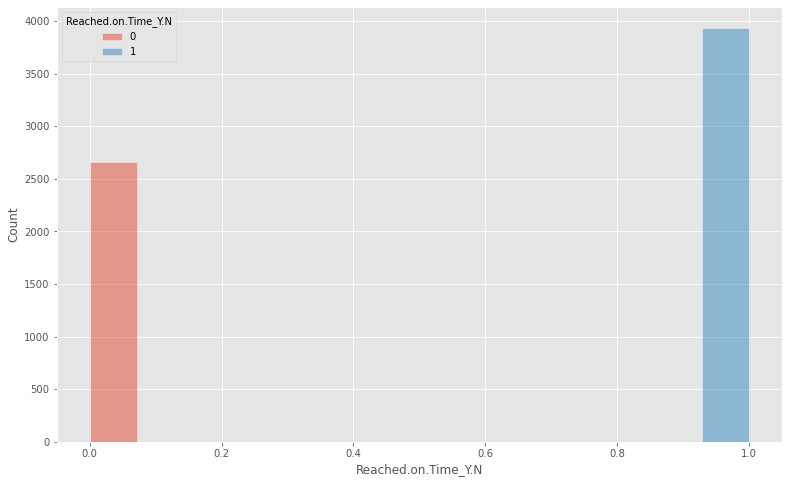

In [56]:
import seaborn as sns

for val in numerical_feature:

    sns.histplot(x=train[val],hue=train['Reached.on.Time_Y.N'])

    plt.show()

### 수치형 변수 데이터 시각화
1. 수치형의 특성을 잘 파악하기 위하여 피쳐의 통계치를 확인. describe 를 통해서 컬럼의 평균값, 최대치, 최소치, 편차등을 확인
2. 데이터 이용하여 종속 변수 0과 1를 통해서 피쳐들의 분포 특성을 시각화.
3. 히스토 그램을 통한 종속변수 0과 1를 통해 변수들의 데이터의 분포 시각화
   - Discount_offered , Weight_in_gms 피쳐가 특정 구간에 따라서 종속변수가 정해짐

In [12]:
train.agg(['skew','kurtosis']).T

,skew,kurtosis
ID,0.005027,-1.192659
Customer_rating,-0.002883,-1.287016
Cost_of_the_Product,-0.165466,-0.968458
Prior_purchases,1.664884,4.000817
Discount_offered,1.820051,2.096800
Weight_in_gms,-0.218728,-1.467108
Reached.on.Time_Y.N,-0.394316,-1.845074


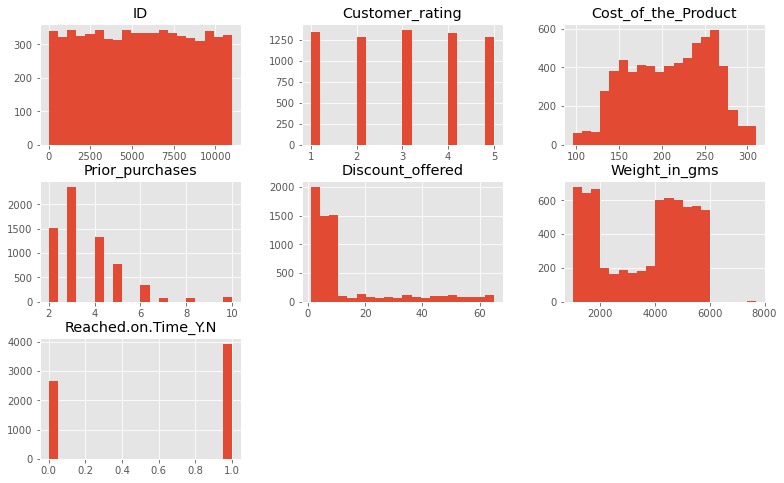

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [13, 8]
train.hist(grid=True, bins=20)
plt.show()

###  히스토그램 및 분포
왜도 첨도 설명~

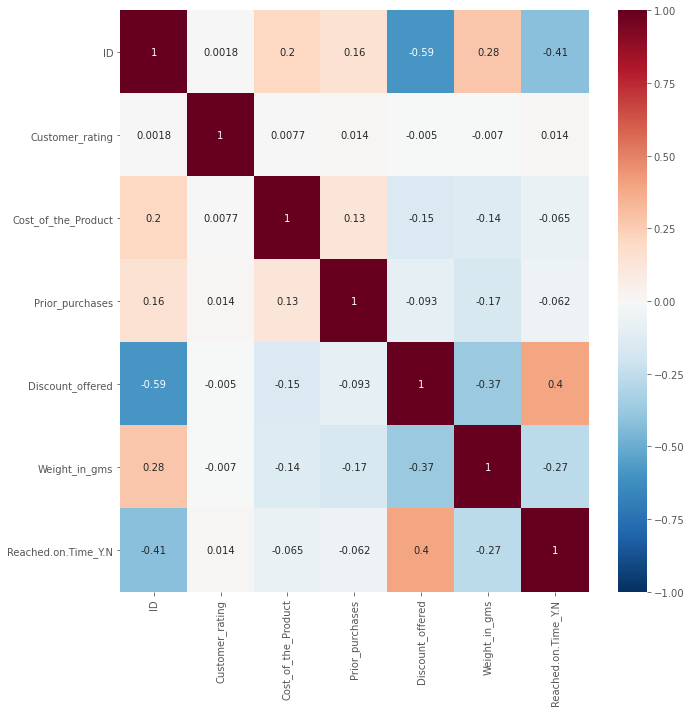

In [14]:
plt.figure(figsize=(10,10))
sns.heatmap(train.corr(method='pearson'), annot=True, cmap = 'RdBu_r', vmin=-1, vmax=1)
plt.tight_layout()
plt.show()

### 상관 관계 분석
변수들의 상관관계가 특이점은 존재 하지 않는다


<Figure size 1440x720 with 0 Axes>

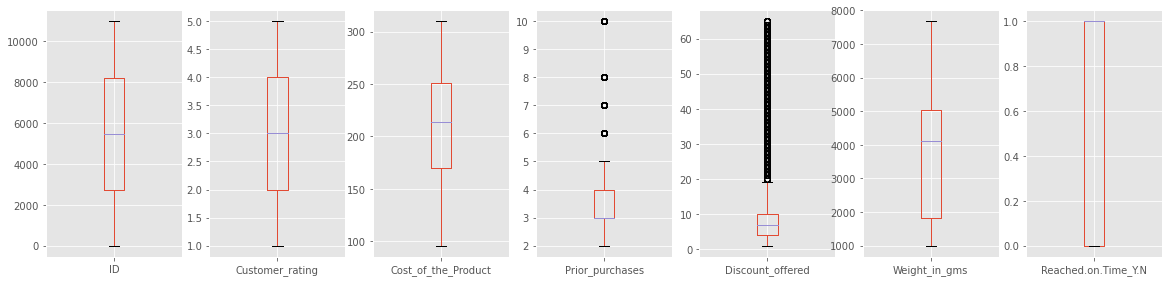

In [15]:
plt.figure(figsize=(20,10))
train.plot(kind='box', subplots=True, layout=(2,len(train.columns)//2+1), figsize=(20,10))
plt.show()

In [27]:
def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    IQR_weight = IQR * weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    
    return outlier_idx

In [28]:
print("이상치 갯수: Q1 - 1.5 * IQR 미만, 또는 Q3 + 1.5 * IQR 초과하는 값")
for column in train[numerical_feature].columns:
    print(column, len(train.loc[detect_outliers(df=train[numerical_feature], column = column), column]))    
    print(train.loc[detect_outliers(df=train[numerical_feature], column = column), column])   

이상치 갯수: Q1 - 1.5 * IQR 미만, 또는 Q3 + 1.5 * IQR 초과하는 값
Customer_rating 0
Series([], Name: Customer_rating, dtype: int64)
Cost_of_the_Product 0
Series([], Name: Cost_of_the_Product, dtype: int64)
Prior_purchases 599
2       10
18      10
20      10
37      10
43       6
        ..
6550     6
6559     8
6570     6
6592     6
6593     6
Name: Prior_purchases, Length: 599, dtype: int64
Discount_offered 1314
1       44
3       27
13      20
16      48
18      37
        ..
6571    50
6573    58
6579    25
6580    62
6589    38
Name: Discount_offered, Length: 1314, dtype: int64
Weight_in_gms 0
Series([], Name: Weight_in_gms, dtype: int64)
Reached.on.Time_Y.N 0
Series([], Name: Reached.on.Time_Y.N, dtype: int64)


### 이상치 분석
IQR 을 통한 이상치 분석 결과 Prior_purchases , Discount_offered 가 이상치로 검색 되었지만 이상치로 보이지 않기 때문에 그대로 진행한다.


# #2 전처리범주형 피쳐 데이터 시각화
- 필요한 전처리를 한 후, 처리한 이유를 서술해주세요

In [29]:
train.loc[train['Customer_care_calls'] =='$7', 'Customer_care_calls'] = '7'
X_test.loc[X_test['Customer_care_calls'] =='$7','Customer_care_calls'] = '7'

In [30]:
train.head()

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,6045,A,Flight,4,3,266,5,high,F,5,1590,0
1,44,F,Ship,3,1,174,2,low,M,44,1556,1
2,7940,F,Road,4,1,154,10,high,M,10,5674,1
3,1596,F,Ship,4,3,158,3,medium,F,27,1207,1
4,4395,A,Flight,5,3,175,3,low,M,7,4833,1


In [31]:
pd.set_option('display.max_rows', 10)
discount_train = train[['Discount_offered','Reached.on.Time_Y.N']].sort_values('Discount_offered')
discount_train[discount_train['Discount_offered'] > 10]['Reached.on.Time_Y.N'].value_counts()

1    1593
Name: Reached.on.Time_Y.N, dtype: int64

In [32]:
pd.set_option('display.max_rows', 10)
weight_train = train[['Weight_in_gms','Reached.on.Time_Y.N']].sort_values('Weight_in_gms')
weight_train[(weight_train['Weight_in_gms'] >2000 ) & (weight_train['Weight_in_gms'] < 4000 ) ]['Reached.on.Time_Y.N'].value_counts()

1    1091
Name: Reached.on.Time_Y.N, dtype: int64

In [435]:
train['Discount'] = 0
train.loc[discount_train['Discount_offered'] > 10, 'Discount'] = 1

X_test['Discount'] = 0
X_test.loc[X_test['Discount_offered'] > 10, 'Discount'] = 1

In [438]:
train['Weight'] = 0
train.loc[(weight_train['Weight_in_gms'] >2000 ) & (weight_train['Weight_in_gms'] < 4000 ), 'Weight'] = 1

X_test['Weight'] = 0
X_test.loc[(X_test['Weight_in_gms'] >2000 ) & (X_test['Weight_in_gms'] < 4000 ), 'Weight'] = 1

# #3 통계분석
- 아래 feature간 통계분석을 자유롭게 수행하고 결과를 서술해주세요
    - Customer rating ~ Reached on time
    - Product importance ~ Customer rating

In [349]:
from scipy import stats
X=pd.crosstab(train['Customer_rating'], train['Reached.on.Time_Y.N'], margins=False)
print(X)
stats.chi2_contingency(X)

Reached.on.Time_Y.N    0    1
Customer_rating              
1                    569  772
2                    499  776
3                    538  829
4                    559  771
5                    496  789


(6.9490873316411355,
 0.13860331241527957,
 4,
 array([[540.83070627, 800.16929373],
        [514.21264019, 760.78735981],
        [551.31661109, 815.68338891],
        [536.39436193, 793.60563807],
        [518.24568051, 766.75431949]]))

In [350]:
from scipy import stats
X=pd.crosstab(train['Customer_rating'], train['Reached.on.Time_Y.N'], margins=False)
print(X)
stats.chi2_contingency(X)

Reached.on.Time_Y.N    0    1
Customer_rating              
1                    569  772
2                    499  776
3                    538  829
4                    559  771
5                    496  789


(6.9490873316411355,
 0.13860331241527957,
 4,
 array([[540.83070627, 800.16929373],
        [514.21264019, 760.78735981],
        [551.31661109, 815.68338891],
        [536.39436193, 793.60563807],
        [518.24568051, 766.75431949]]))

### 독립성 검정
Customer rating 과 Reached on time의 독립성 검정  
독립성 검정결과 P value값이 0.13 이상 나왔기 때문에.. Customer rating 과 Reached on time 연관성이 없다.


# #4 모델링 및 예측
- 모델링
    - 3가지 모델을 선택해 모델링해주세요.
    - 모델을 선택한 이유를 서술해주세요
- 예측
    - 성능지표를 3가지 선택해 측정해주세요
    - 지표를 선택한 이유를 서술해주세요

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

# 인자로 입력받은 DataFrame을 복사 한 뒤 ID 컬럼만 삭제하고 복사된 DataFrame 반환
def get_preprocessed_df(df=None):
    df_copy = df.copy()
#     display(df_copy)
    df_copy.drop('ID', axis=1, inplace=True)
    
    df_copy['Discount'] = 0
    df_copy.loc[df_copy['Discount_offered'] > 10, 'Discount'] = 1

    df_copy['Weight'] = 0
    df_copy.loc[(df_copy['Weight_in_gms'] >2000 ) & (df_copy['Weight_in_gms'] < 4000 ), 'Weight'] = 1

    return df_copy

def get_ohe_hotEncoder(v_train, v_test):
    category = [ col for col in v_train.columns if v_train[col].dtypes == "object"]

    ohe = OneHotEncoder(sparse=False,handle_unknown='ignore')
    train_ohe = ohe.fit_transform(v_train[category])

    ohe_columns =[]
    for index, val in enumerate(category):
        for col in ohe.categories_[index]:
            ohe_columns.append(val+'_' + str(col))

    train_ohe_df = pd.DataFrame(train_ohe, columns = ohe_columns ) 
    df_train_ohe_df = pd.concat([v_train.drop(category,axis=1), train_ohe_df], axis =1 )

    test_ohe  = ohe.transform(v_test[category])
    test_ohe_df = pd.DataFrame(test_ohe, columns = ohe_columns )
    df_test_ohe_df = pd.concat([v_test.drop(category,axis=1),test_ohe_df], axis =1 )
    print(df_train_ohe_df.shape, df_test_ohe_df.shape)
    return df_train_ohe_df, df_test_ohe_df
    

# 사전 데이터 가공 후 학습과 테스트 데이터 세트를 반환하는 함수.
def get_train_test_dataset(v_train, v_test):
    # 인자로 입력된 DataFrame의 사전 데이터 가공이 완료된 복사 DataFrame 반환
    f_train = get_preprocessed_df(v_train)
    f_test = get_preprocessed_df(v_test)
    
    f_train, f_test = get_ohe_hotEncoder(f_train, f_test)
    
    # DataFrame의 맨 마지막 컬럼이 레이블, 나머지는 피처들
    X_features = f_train.drop('Reached.on.Time_Y.N', axis = 1 )
    y_target = f_train['Reached.on.Time_Y.N']
    
#     stand = StandardScaler()
#     X_features = pd.DataFrame(stand.fit_transform(X_features), columns=X_features.columns)
#     f_test = pd.DataFrame(stand.transform(f_test), columns=f_test.columns)
    

    # train_test_split( )으로 학습과 테스트 데이터 분할. stratify=y_target으로 Stratified 기반 분할
    train_X, test_X, train_y, test_y = \
    train_test_split(X_features, y_target, test_size=0.3, random_state=0, stratify=y_target)
    # 학습과 테스트 데이터 세트 반환
    return train_X, test_X, train_y, test_y

train_X, test_X, train_y, test_y = get_train_test_dataset(train,X_test)

(6598, 27) (4401, 26)


In [52]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss 

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    logscore = log_loss(y_test, pred_proba)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba[:, 1])    
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}, log_loss:{5:.4f}'.format(accuracy, precision, recall, f1, roc_auc, logscore))
    
# 인자로 사이킷런의 Estimator객체와, 학습/테스트 데이터 세트를 입력 받아서 학습/예측/평가 수행.
def get_model_train_eval(model, ftr_train=None, ftr_test=None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    print("---" * 30)
    print("model:", model.__class__.__name__)
    pred_proba = model.predict_proba(ftr_test)
    get_clf_eval(tgt_test, pred, pred_proba)    
    print("---" * 30)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

lr = LogisticRegression(max_iter=5000)
get_model_train_eval(lr,train_X,test_X, train_y, test_y)

------------------------------------------------------------------------------------------
model: LogisticRegression
오차 행렬
[[627 172]
 [467 714]]
정확도: 0.6773, 정밀도: 0.8059, 재현율: 0.6046,    F1: 0.6909, AUC:0.7375, log_loss:0.5114
------------------------------------------------------------------------------------------


In [54]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000)
get_model_train_eval(rfc,train_X,test_X, train_y, test_y)

------------------------------------------------------------------------------------------
model: RandomForestClassifier
오차 행렬
[[592 207]
 [441 740]]
정확도: 0.6727, 정밀도: 0.7814, 재현율: 0.6266,    F1: 0.6955, AUC:0.7413, log_loss:0.5132
------------------------------------------------------------------------------------------


In [55]:
from lightgbm import LGBMClassifier
lgbm = LGBMClassifier(n_estimators=1000)
get_model_train_eval(lgbm,train_X,test_X, train_y, test_y)

------------------------------------------------------------------------------------------
model: LGBMClassifier
오차 행렬
[[497 302]
 [360 821]]
정확도: 0.6657, 정밀도: 0.7311, 재현율: 0.6952,    F1: 0.7127, AUC:0.7391, log_loss:0.8108
------------------------------------------------------------------------------------------


### 모델링 3가지 및 선택한 이유

LogisticRegression 

RandomForestClassifier

LGBMClassifier

### 성능 지표 3가지 및 선택한 이유

### 재현율
재현율(recall)은 실제 양성 클래스에 속한 표본 중에 양성 클래스에 속한다고 출력한 표본의 수의 비율을 뜻한다. 높을수록 좋은 모형이다. FDS(사기 거래를 찾아 내는 시스템)의 경우 실제 사기 거래 중에서 실제 사기 거래라고 예측한 거래의 비율이 된다. TPR(true positive rate) 또는 민감도(sensitivity)라고도 한다.

재현율이란 실제 True인 것 중에서 모델이 True라고 예측한 것의 비율입니다. 

$$\text{recall} = \dfrac{TP}{TP + FN}$$

### 정밀도
정밀도(precision)은 양성 클래스에 속한다고 출력한 샘플 중 실제로 양성 클래스에 속하는 샘플 수의 비율을 말한다. 높을수록 좋은 모형이다. FDS의 경우, 사기 거래라고 예측한 거래 중 실제 사기 거래의 비율이 된다.
 
$$\text{precision} = \dfrac{TP}{TP + FP}$$

### Accuracy(정확도)

정확도(accuracy)는 전체 샘플 중 맞게 예측한 샘플 수의 비율을 뜻한다. 높을수록 좋은 모형이다. 일반적으로 학습에서 최적화 목적함수로 사용된다.
 
$$ \text{accuracy} = \dfrac{TP + TN}{TP + TN + FP + FN} $$

정확도는 가장 직관적으로 모델의 성능을 나타낼 수 있는 평가 지표이다. 하지만, 고려해야하는 것이 있다. 바로 domain의 편중(bias)입니다. 만약 우리가 예측하고자 하는 한달 동안이 특정 기후에 부합하여 비오는 날이 흔치 않다고 생각보면 이 경우에는 해당 data의 domain이 불균형하게되므로 맑은 것을 예측하는 성능은 높지만, 비가 오는 것을 예측하는 성능은 매우 낮을 수 밖에 없습니다. 따라서 이를 보완할 지표가 필요합니다.

### F Score
정밀도와 재현율의 가중조화평균(weight harmonic average)을 F점수(F-score)라고 한다. 정밀도에 주어지는 가중치를 베타(beta)라고 한다.
 
$$
F_\beta = (1 + \beta^2) \, ({\text{precision} \times \text{recall}}) \, / \, ({\beta^2 \, \text{precision} + \text{recall}})
$$

베타가 1인 경우를 특별히 F1점수라고 한다.

$$
F_1 = 2 \cdot \text{precision} \cdot \text{recall} \, / \, (\text{precision} + \text{recall})
$$

F1 score는 데이터 label이 불균형 구조일 때, 모델의 성능을 정확하게 평가할 수 있으며, 성능을 하나의 숫자로 표현할 수 있습니다. 

### logloss
1. 모델 성능 평가 시 사용 가능한 지표
1. 분류(Classification) 모델 평가시 사용합니다.
1. 최종적으로 맞춘 결과만 가지고 성능을 평가할 경우, 얼만큼의 확률로 해당 답을 얻은건지 평가가 불가능하다. 답은 맞췄지만 20%의 확률로 그저 찍은거라면 성능이 좋은 모델이라고 할 수 없을 것이다. 이를 보완하기 위해서는 확률 값을 평가 지표로 사용하면 된다. 
1. Log loss는 모델이 예측한 확률 값을 직접적으로 반영하여 평가한다. 확률 값을 음의 log함수에 넣어 변환을 시킨 값으로 평가하는데, 이는 잘못 예측할 수록, 패널티를 부여하기 위함이다. 
1. 예로, 100%의 확률(확신)로 답을 구한 경우 log loss는 -log(1.0) = 0이다. 80% 확률의 경우에는, -log(0.8) = 0.22314이다. 60% 확률의 경우에는, -log(0.6) = 0.51082이다. 확률이 낮아질 수록 log loss 값이 기하급수적으로 증가하는 것을 볼 수 있다. 이런식으로 log loss는 확률이 낮을 때 패널티를 더 많이 부여하기 위해 음의 로그 함수를 사용한다.
1.  logloss 값은  분류모델에서  평가지표로  사용하는  지표  중  하나이며, 0에  가까울수록  정확하다는  뜻이 고, 확률이  낮아질수록 logloss값은  급격하게  커진다

In [60]:
from sklearn.model_selection import train_test_split,StratifiedKFold
train_df = get_preprocessed_df(train)
test_df = get_preprocessed_df(X_test)
train_df,test_df  = get_ohe_hotEncoder(train_df, test_df)

(6598, 27) (4401, 26)


In [65]:
X = train_df.drop('Reached.on.Time_Y.N', axis = 1)
y = train_df['Reached.on.Time_Y.N']
stf = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)

pred_result = np.zeros(test_df.shape[0])

for train_index, val_index in stf.split(X, y):
    train_x , train_y = X.iloc[train_index], y.iloc[train_index]
    test_x, test_y = X.iloc[val_index], y.iloc[val_index]
    rfc = RandomForestClassifier(n_estimators=500)
    rfc.fit(train_x, train_y)
    pred = rfc.predict(test_x)
    score = accuracy_score(test_y, pred)
#     print(score) 
    pred_proba = rfc.predict_proba(test_df)[:, 1] / stf.n_splits
    pred_result += pred_proba


In [69]:
lgbm_pred = np.zeros((test_df.shape[0]))
for tr_idx, val_idx in stf.split(X, y) :
    tr_x, tr_y = X.iloc[tr_idx], y.iloc[tr_idx]
    val_x, val_y = X.iloc[val_idx], y.iloc[val_idx]
    
    lgbm = LGBMClassifier(random_state = 42)
    lgbm.fit(tr_x, tr_y)
    val_pred = lgbm.predict_proba(val_x)[:, 1]
    val_pred = [1 if p >= 0.5 else 0 for p in val_pred]
    val_acc = accuracy_score(val_y, val_pred)
    print(val_acc)
    
    fold_pred = lgbm.predict_proba(test_df)[:, 1] / stf.n_splits
    lgbm_pred += fold_pred

0.6363636363636364
0.6530303030303031
0.6636363636363637
0.6747536012130402
0.6444275966641395


In [71]:
X_test['target'] = (pred_result + lgbm_pred) / 2
X_test['target'] = [1 if p >= 0.5 else 0 for p in X_test['target']]

In [75]:
y_test = pd.read_csv('./data/test_label/y_test.csv')
accuracy_score(y_test['Reached.on.Time_Y.N'], X_test['target'])

0.6632583503749148

# #5 추가적인 개선 방안
을 서술해주세요